<a href="https://colab.research.google.com/github/Pranjal11095/DAI101/blob/main/Rathod_Pranjal_23114084.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/online_dataset.csv'

df = pd.read_csv(file_path)
df.head()




,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
# Inspect the structure of the dataset
print("Dataset Overview:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Handle missing values
print("\nMissing Values Before:")
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

# Identify and remove duplicates
print(f"\nDuplicate Records Before: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Detect and treat outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Standardize categorical values
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower().str.replace(' ', '_')

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB

Summary Statistics:
       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.00


Univariate Analysis:


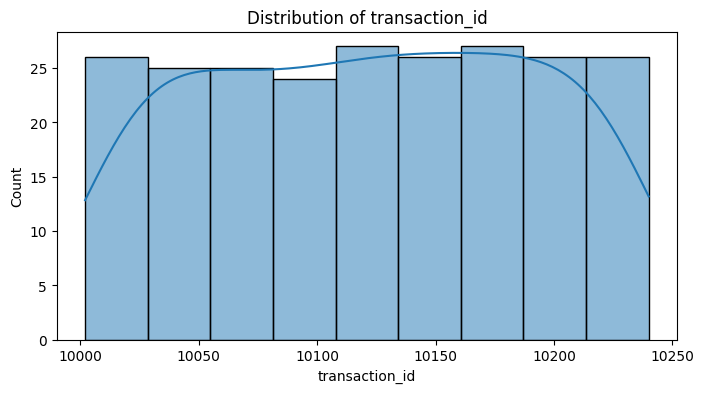

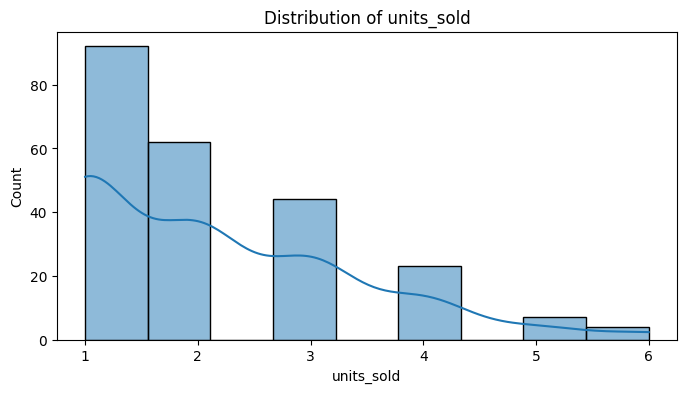

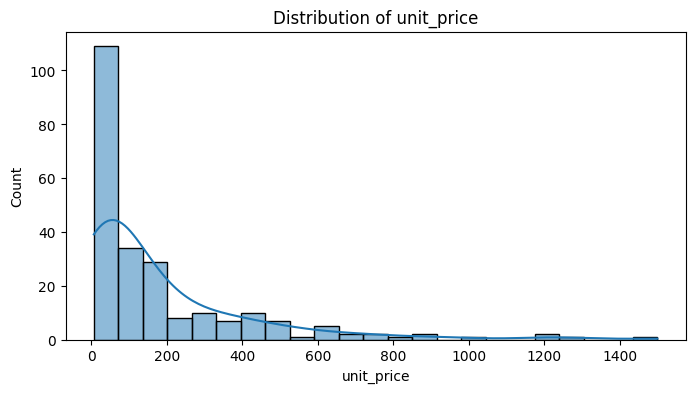

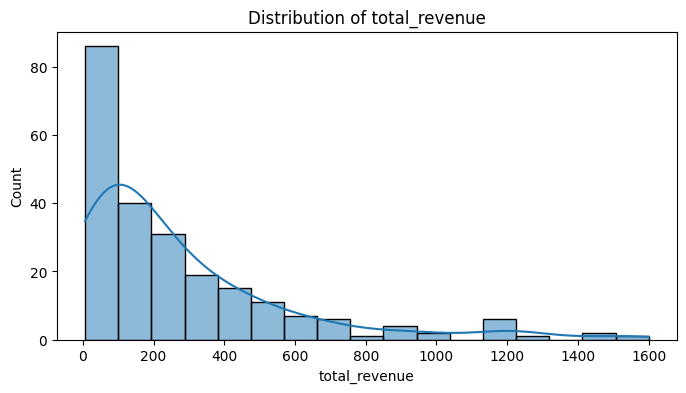

In [5]:
# EDA: Univariate Analysis
print("\nUnivariate Analysis:")
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Bivariate Analysis:


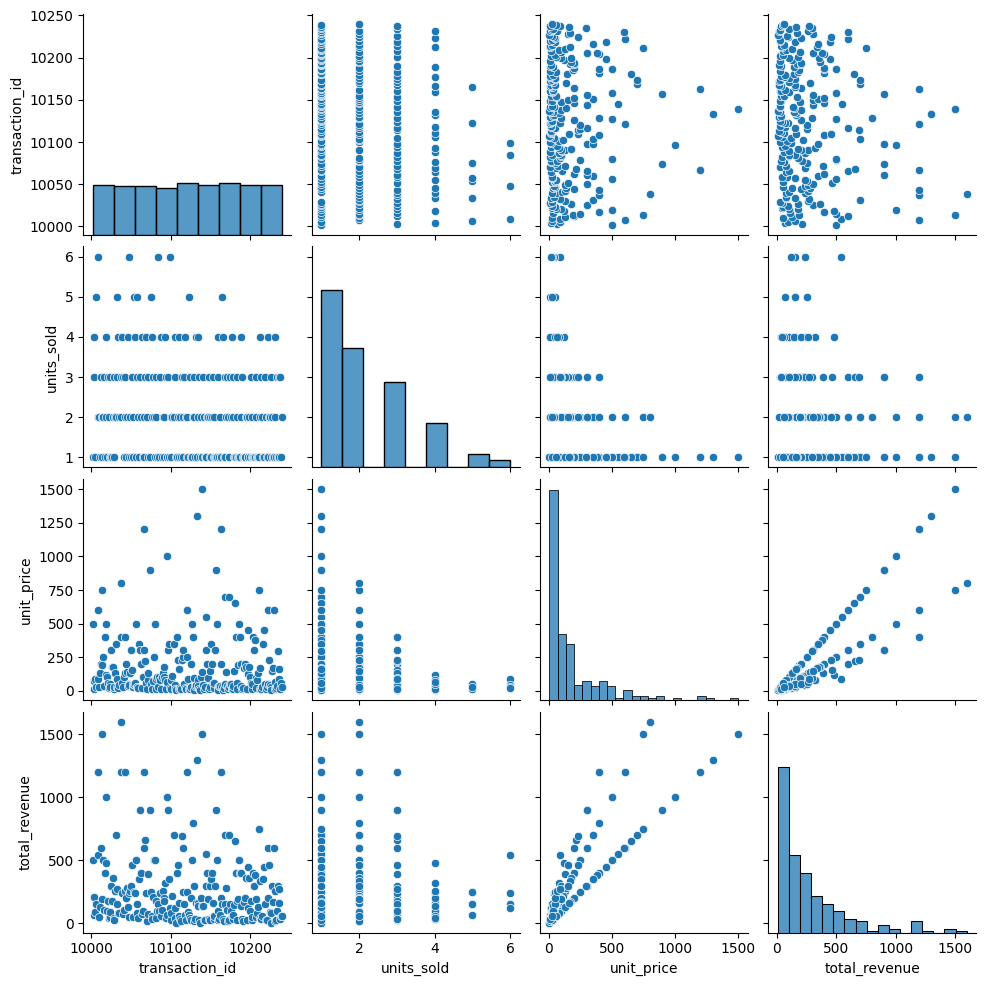

In [6]:
# EDA: Bivariate Analysis
print("\nBivariate Analysis:")
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

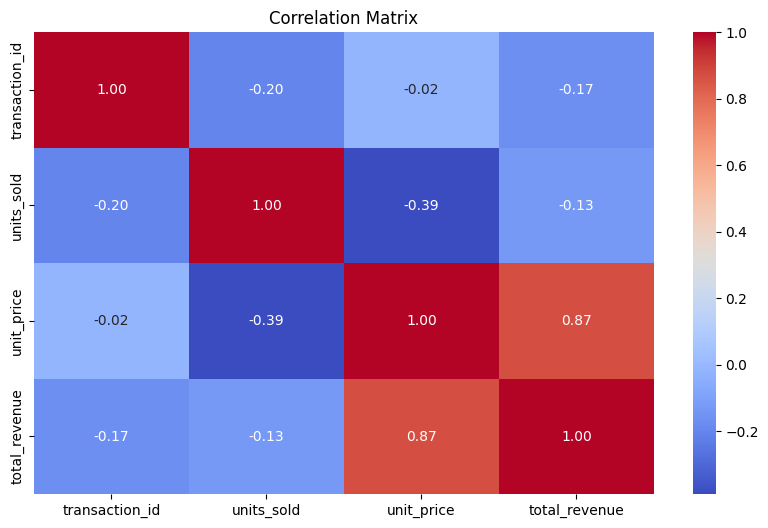


Grouped Comparisons:


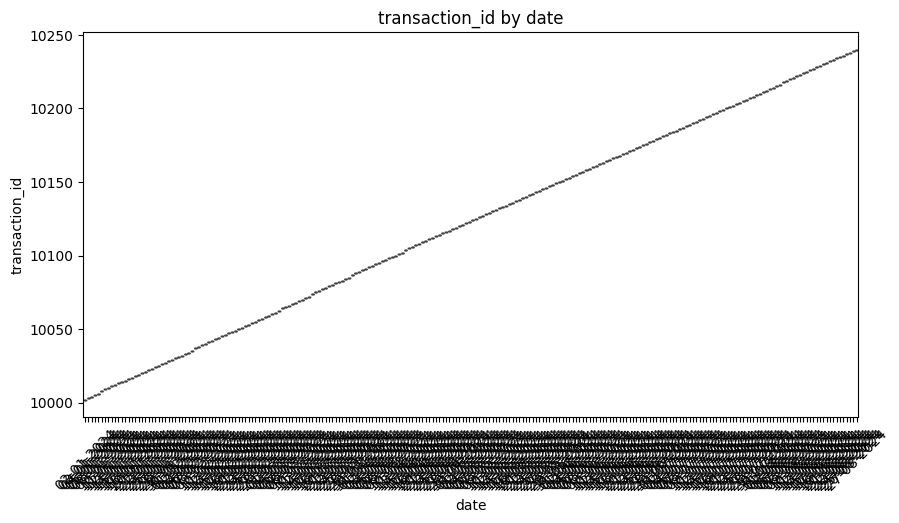

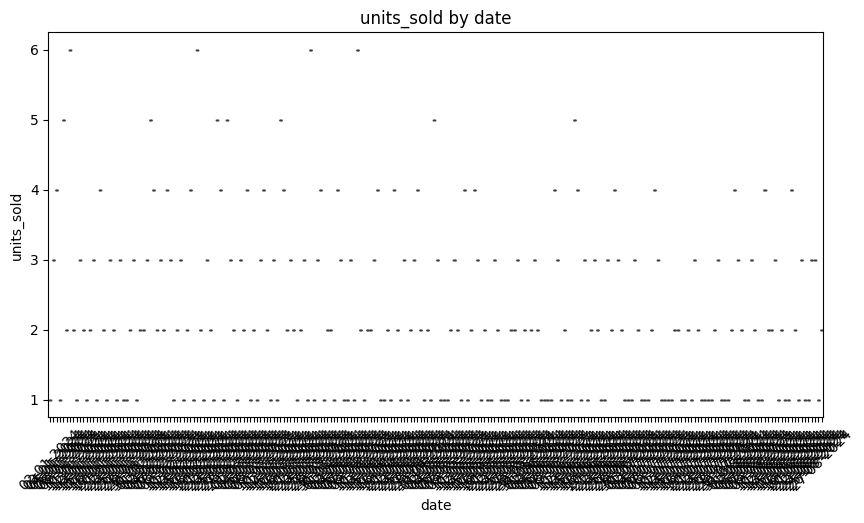

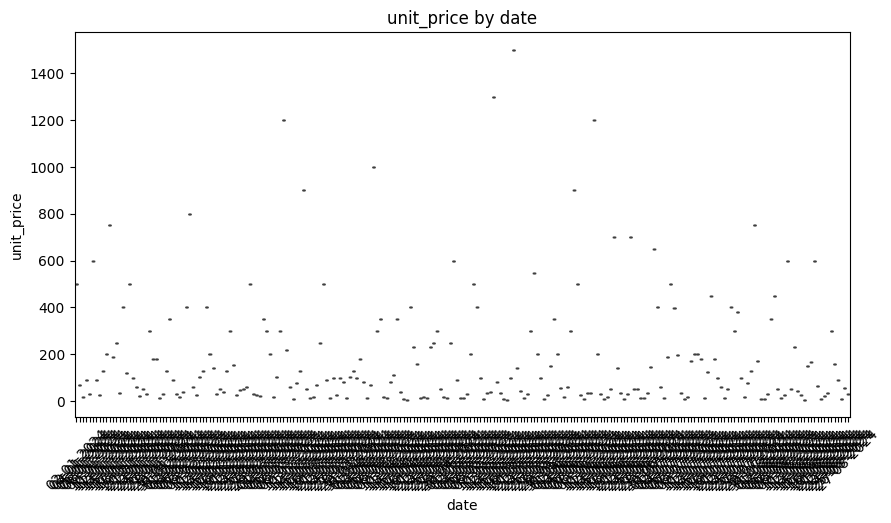

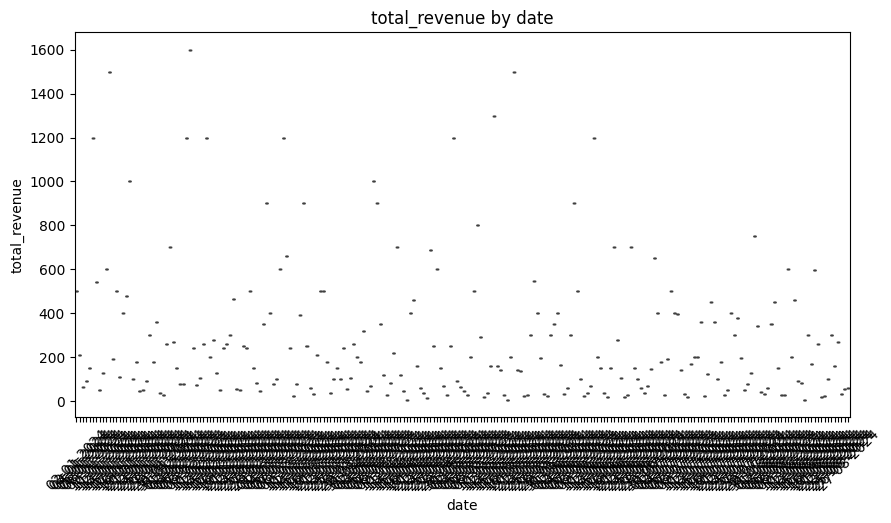

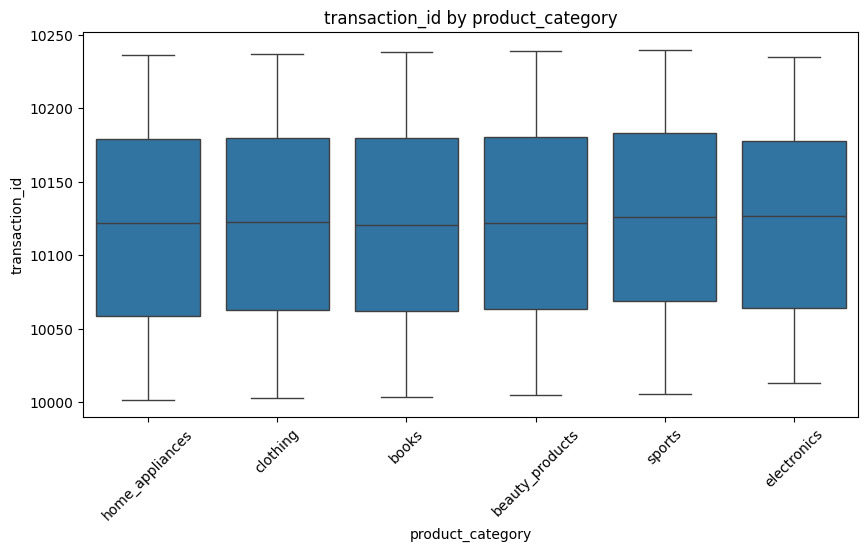

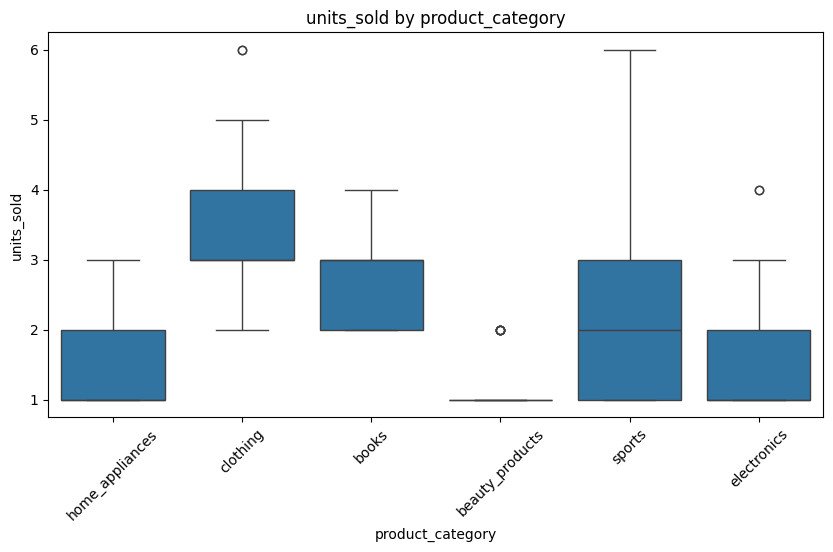

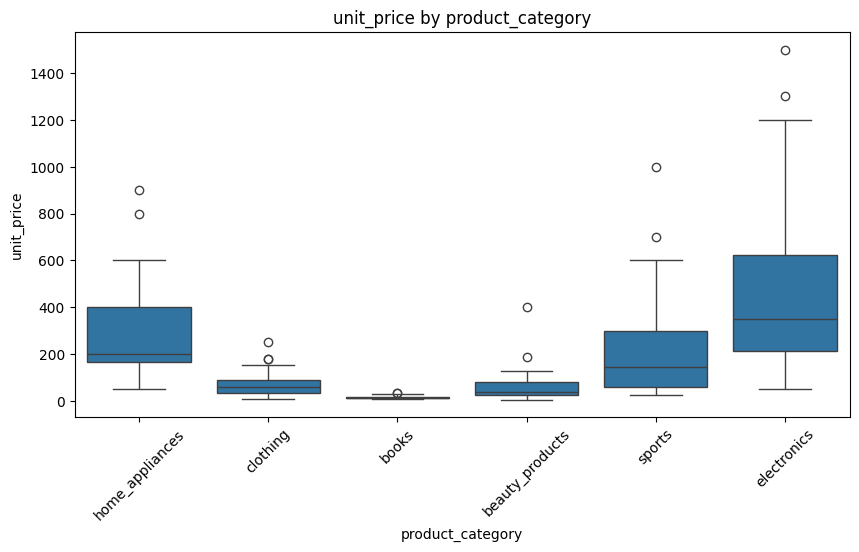

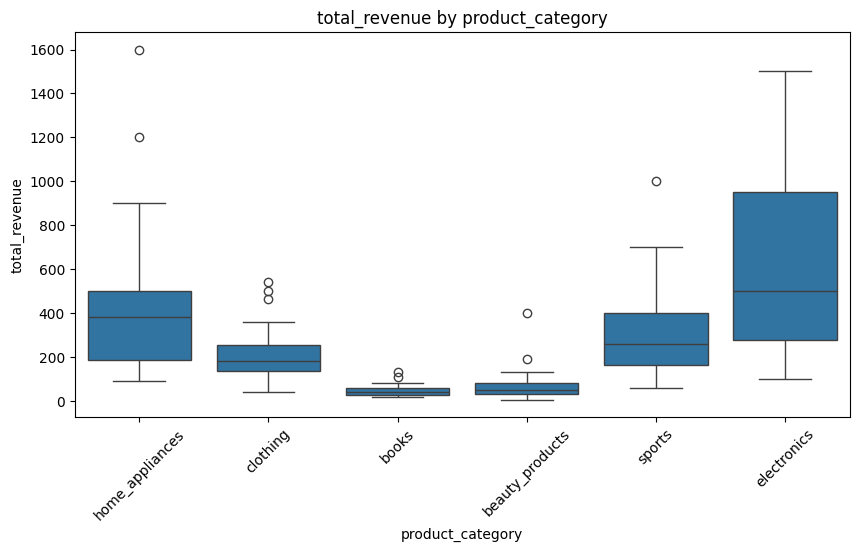

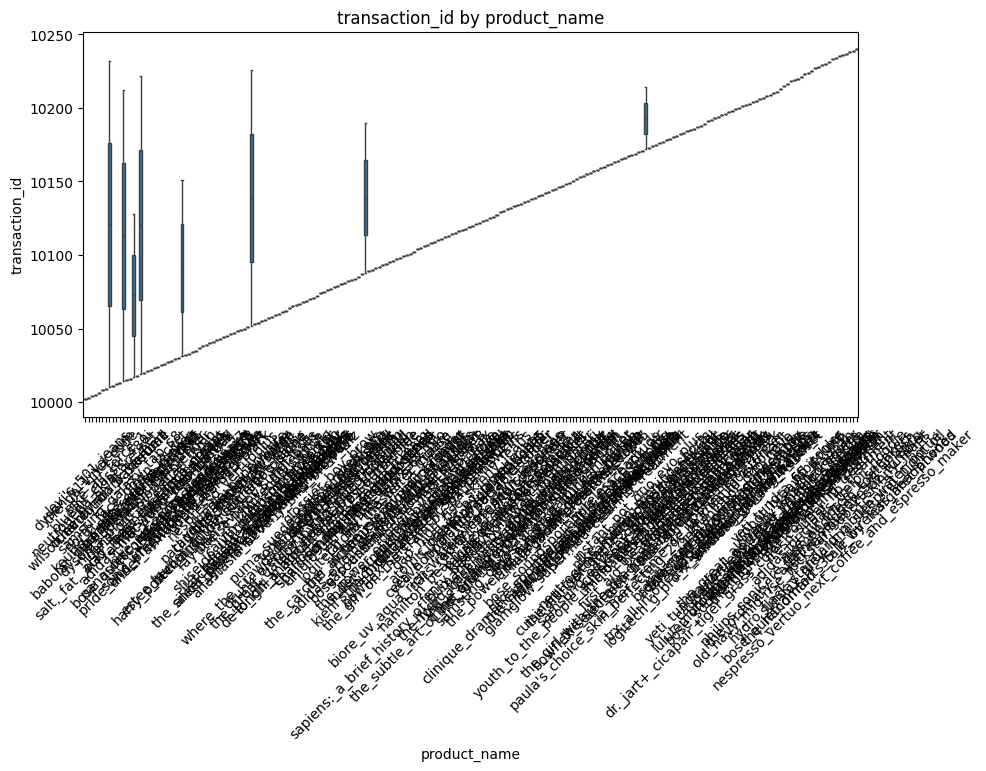

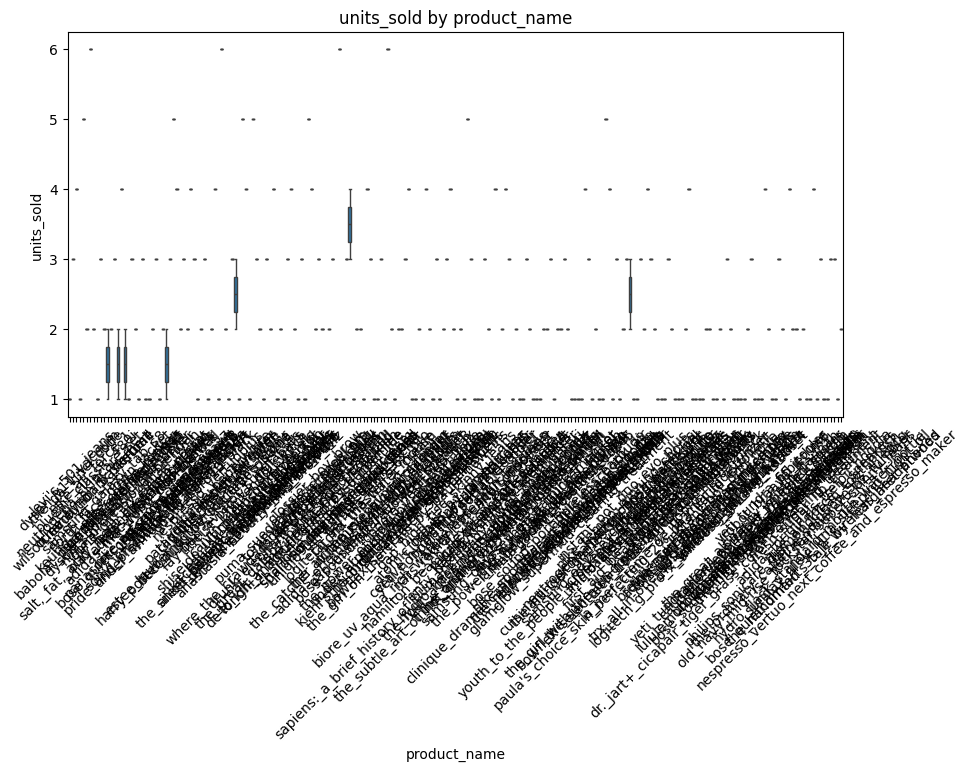

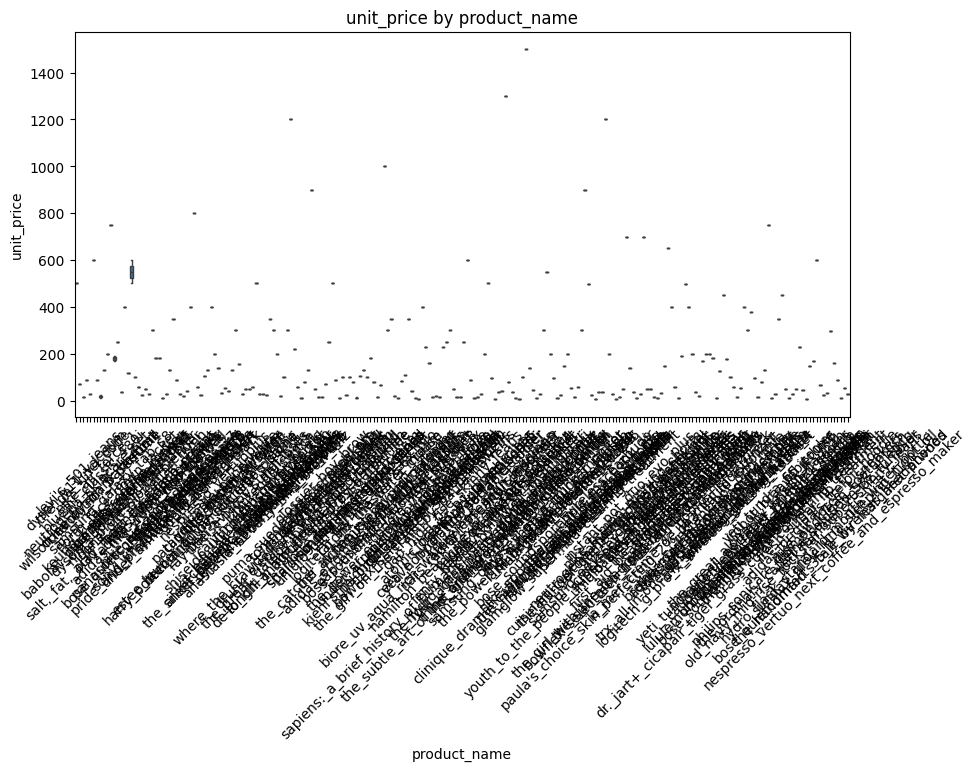

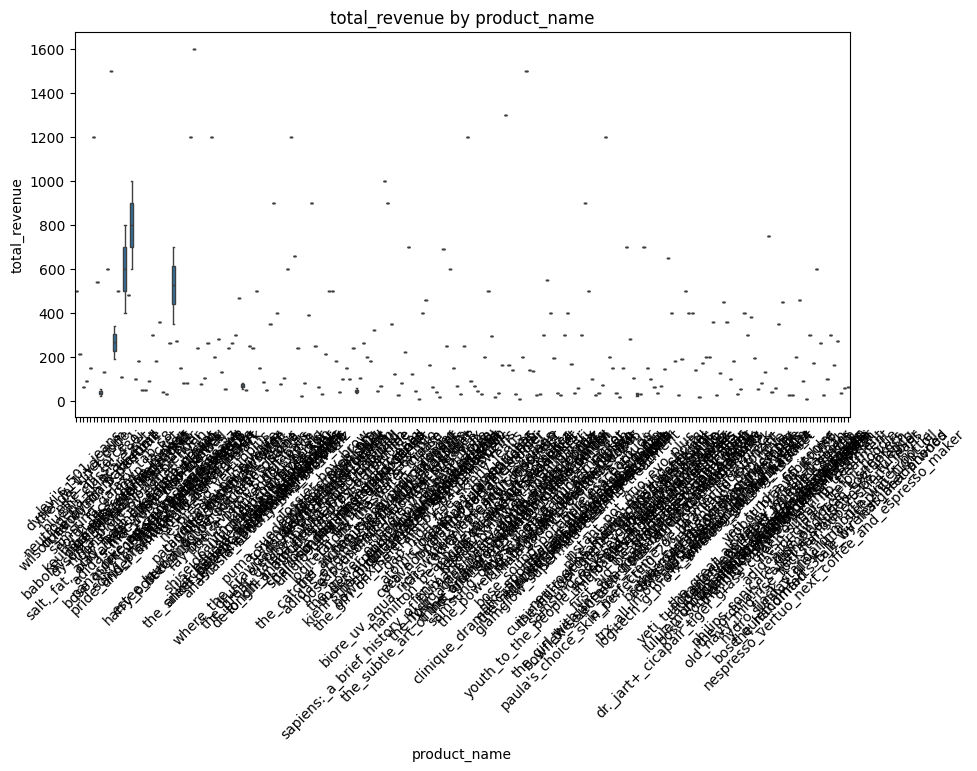

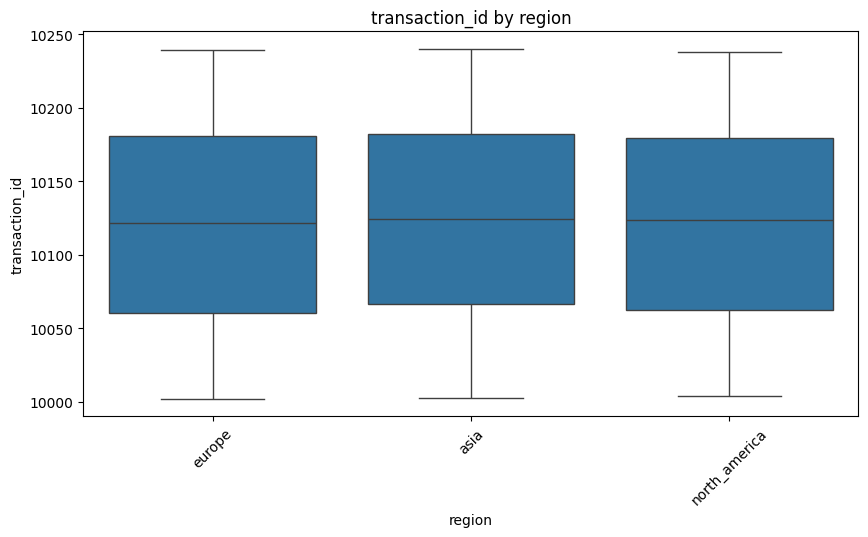

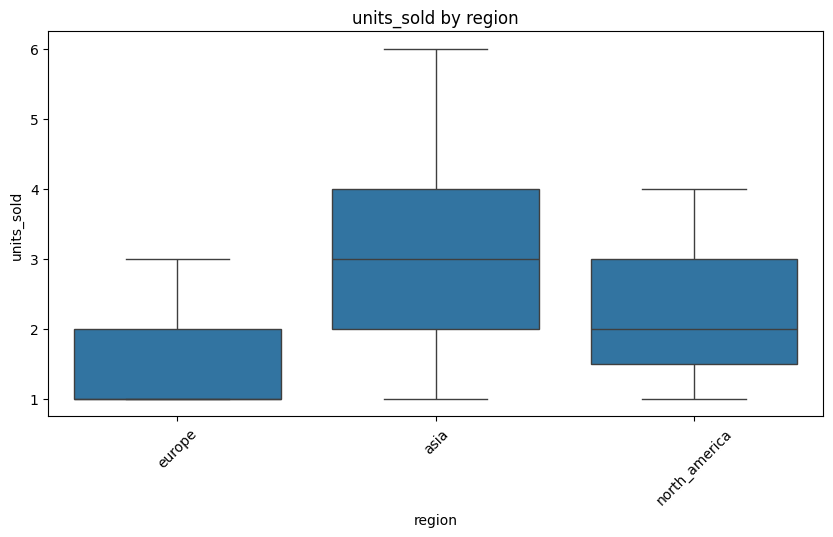

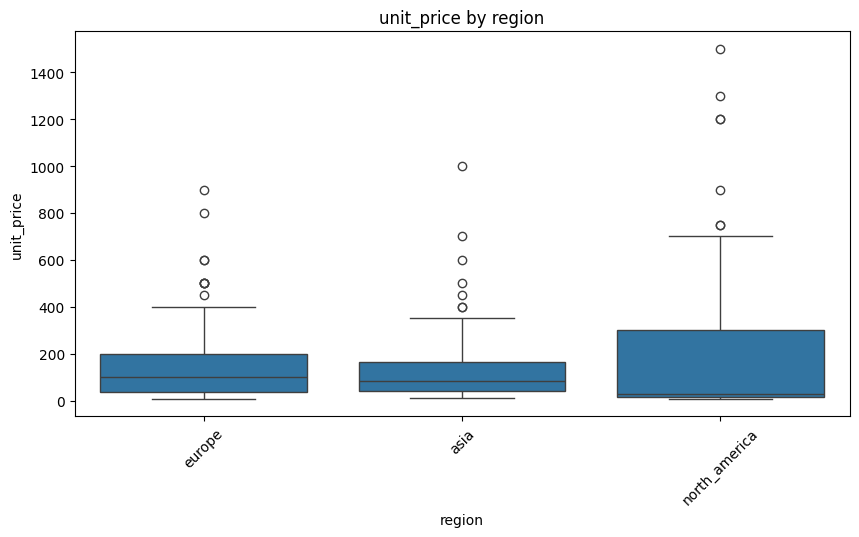

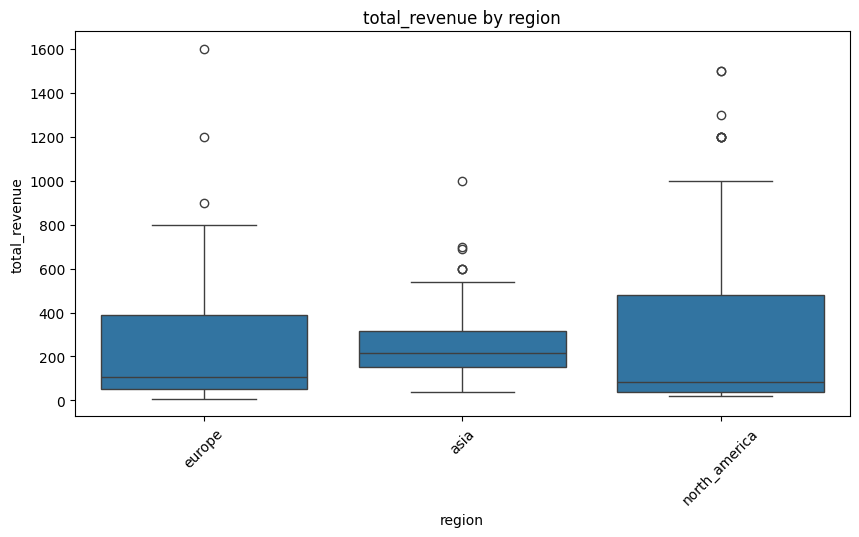

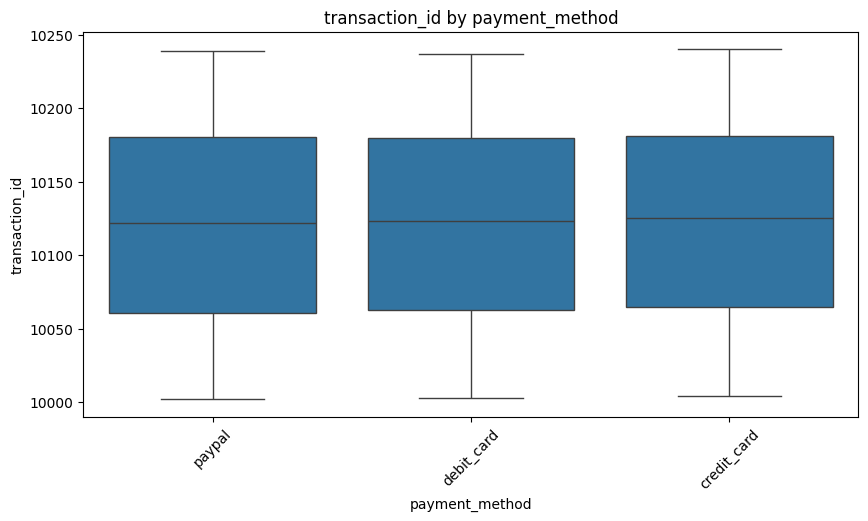

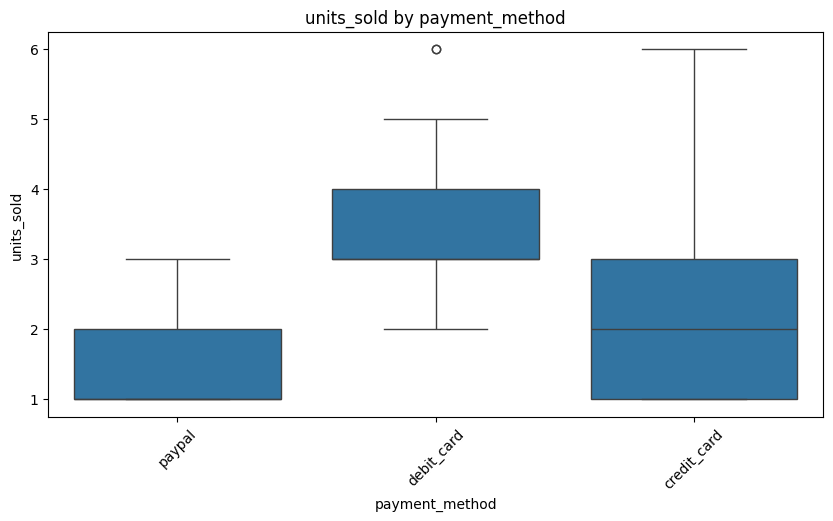

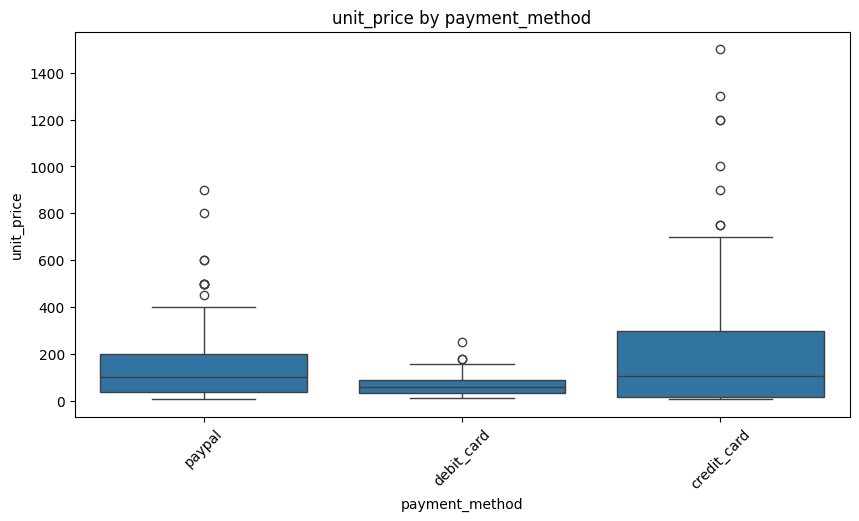

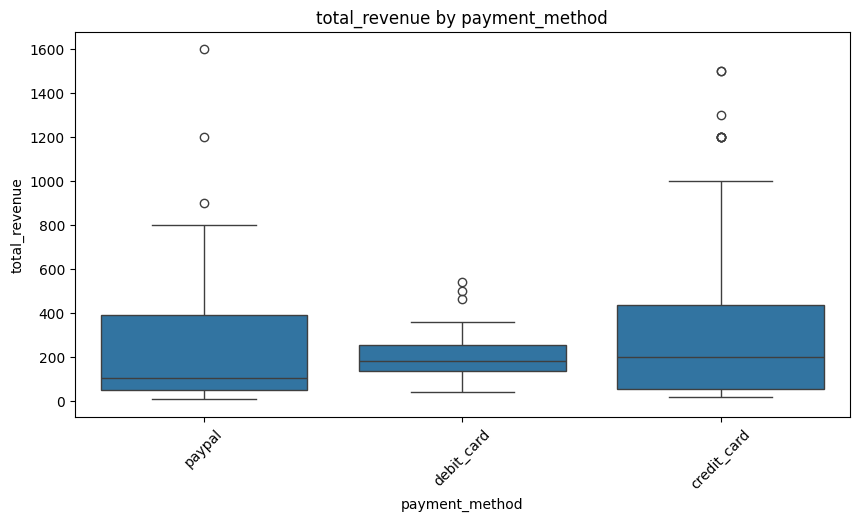


Final Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 1 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    232 non-null    int64  
 1   date              232 non-null    object 
 2   product_category  232 non-null    object 
 3   product_name      232 non-null    object 
 4   units_sold        232 non-null    int64  
 5   unit_price        232 non-null    float64
 6   total_revenue     232 non-null    float64
 7   region            232 non-null    object 
 8   payment_method    232 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.1+ KB
Cleaned dataset saved to: /content/cleaned_online_dataset.csv


In [9]:
# Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Grouped comparisons
print("\nGrouped Comparisons:")
categorical_cols = df.select_dtypes(include='object').columns
for cat_col in categorical_cols:
    for num_col in df.select_dtypes(include=np.number).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

# Final Cleaned Dataset Overview
print("\nFinal Cleaned Dataset Overview:")
df.info()

# Save cleaned dataset
cleaned_file_path = '/content/cleaned_online_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")
